In [4]:
import pandas as pd

btwd_raw_data = pd.read_csv("../../data/tr/bilkent-turkish-writings/bilkent-turkish-writings-dataset.csv")

In [5]:
len(btwd_raw_data)

,Unnamed: 0,text
0,0,BATUHAN ERDURCAN \r\n21301855 \r\nTURK 101-13 ...
1,1,\r\nYalçın Arslan \r\n21300458 \r\nAslı Uçar ...
2,2,Sudenur SOYSAL \r\nGÜZELLİK Mİ ÇİRKİNLİK Mİ HA...
3,3,Mars’ta Yaşam mı? \r\n \r\nHayatım boyunca evr...
4,4,"Bir Şehrin İki Yakasında \r\n \r\n""İki büyük c..."


In [1]:
from utils import read_json

btwd_data = read_json("../../data/tr/bilkent-turkish-writings/btwd_prep_post.json")

In [3]:
len(btwd_data["data"])

214524

In [6]:
unique_roots = set()

for sample in btwd_data["data"]:
    unique_roots.add(sample["root"])

len(unique_roots)

9576

In [9]:
unique_meta_morphemes = set()

for sample in btwd_data["data"]:
    unique_meta_morphemes.update(set(sample["meta_morphemes"]))

len(unique_meta_morphemes)

103

In [10]:
unique_morphemes = set()

for sample in btwd_data["data"]:
    unique_morphemes.update(set(sample["morphemes"]))

len(unique_morphemes)

372

In [7]:
unique_meta_morpheme_combs = set()

for sample in btwd_data["data"]:
    unique_meta_morpheme_combs.add(tuple(sample["meta_morphemes"]))

len(unique_meta_morpheme_combs)

21930

In [8]:
unique_morphemes_combs = set()

for sample in btwd_data["data"]:
    unique_morphemes_combs.add(tuple(sample["morphemes"]))

len(unique_morphemes_combs)

37853

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

sns.set_theme(style="whitegrid")

<Axes: title={'center': 'Distribution of meta suffixes (top 20)'}, xlabel='Meta suffix', ylabel='Count'>

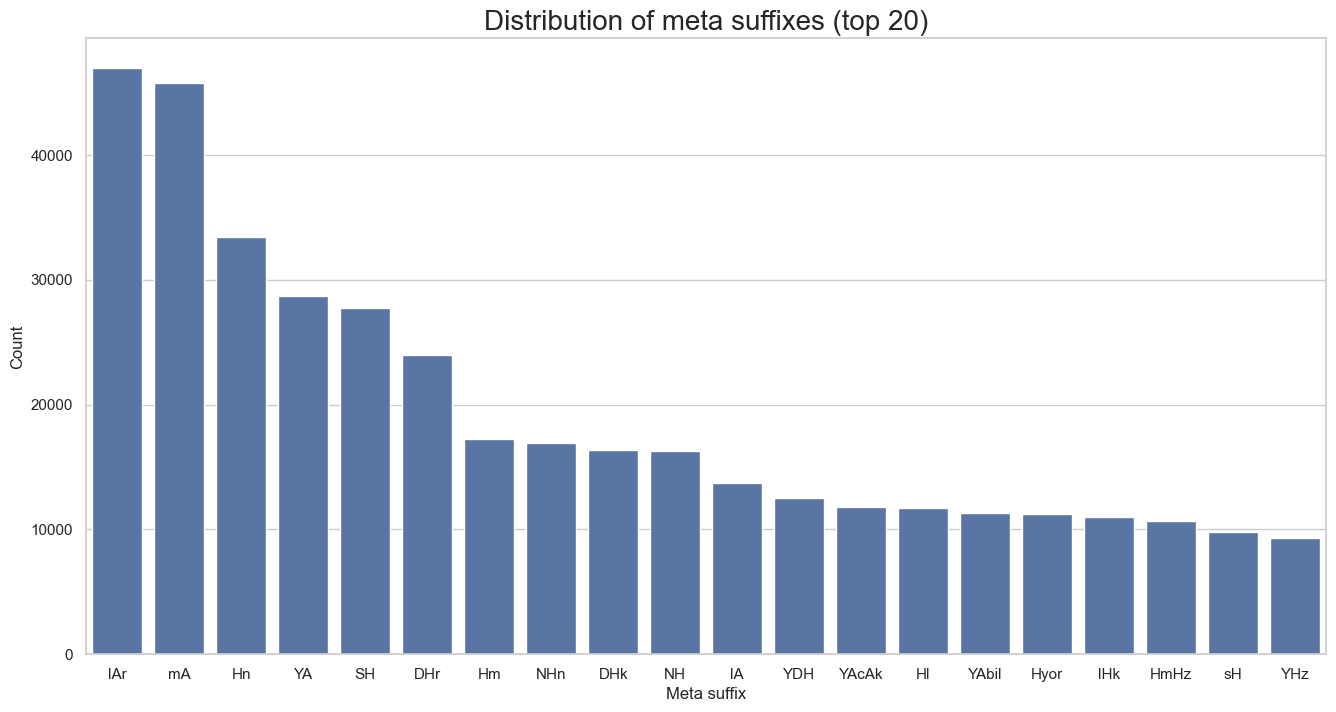

In [28]:
meta_morphemes = []

for sample in btwd_data["data"]:
    meta_morphemes.extend(sample["meta_morphemes"])

meta_morpheme_counter = Counter(meta_morphemes)
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Distribution of meta suffixes (top 20)")
ax.set_xlabel("Meta suffix")
ax.set_ylabel("Count")
# set the title font size
ax.title.set_size(20)
sns.barplot(dict(meta_morpheme_counter.most_common(20)), ax=ax)

<Axes: title={'center': 'Distribution of suffixes (top 20)'}, xlabel='Suffix', ylabel='Count'>

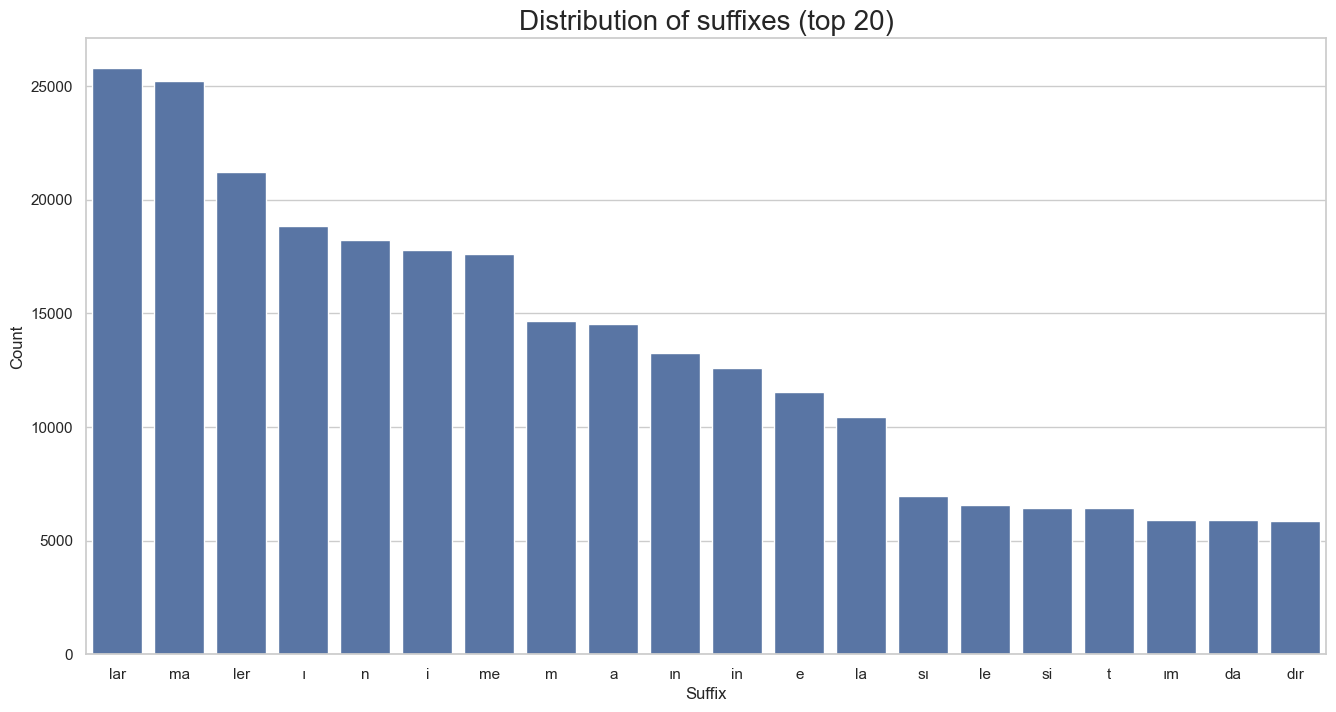

In [29]:
morphemes = []

for sample in btwd_data["data"]:
    morphemes.extend(sample["morphemes"])

morpheme_counter = Counter(morphemes)
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Distribution of suffixes (top 20)")
ax.set_xlabel("Suffix")
ax.set_ylabel("Count")
ax.title.set_size(20)
sns.barplot(dict(morpheme_counter.most_common(20)), ax=ax)

<Axes: title={'center': 'Distribution of meta suffix combinations (top 20)'}, xlabel='Meta suffix combination', ylabel='Count'>

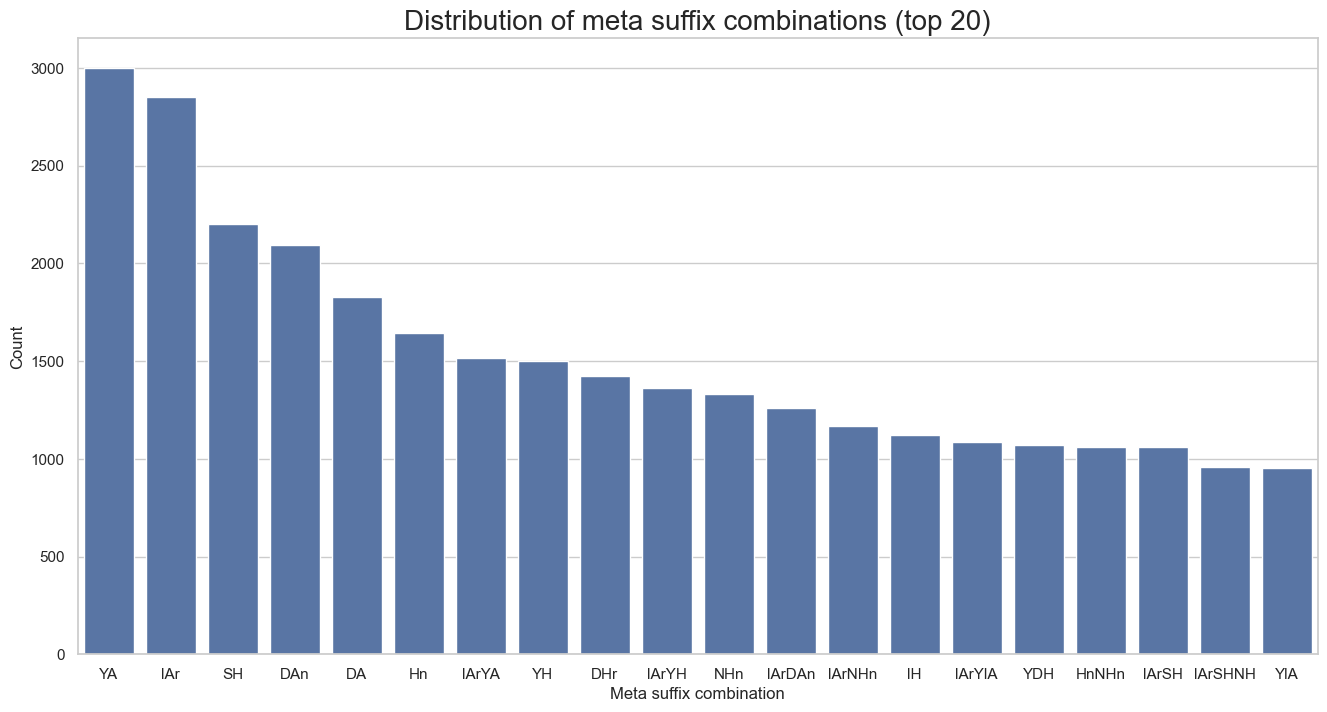

In [33]:
meta_morpheme_combs = []

for sample in btwd_data["data"]:
    meta_morpheme_combs.append("".join(sample["meta_morphemes"]))

meta_morpheme_combs_counter = Counter(meta_morpheme_combs)
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Distribution of meta suffix combinations (top 20)")
ax.set_xlabel("Meta suffix combination")
ax.set_ylabel("Count")
# set the title font size
ax.title.set_size(20)
sns.barplot(dict(meta_morpheme_combs_counter.most_common(20)), ax=ax)

<Axes: title={'center': 'Distribution of suffix combinations (top 20)'}, xlabel='Suffix combination', ylabel='Count'>

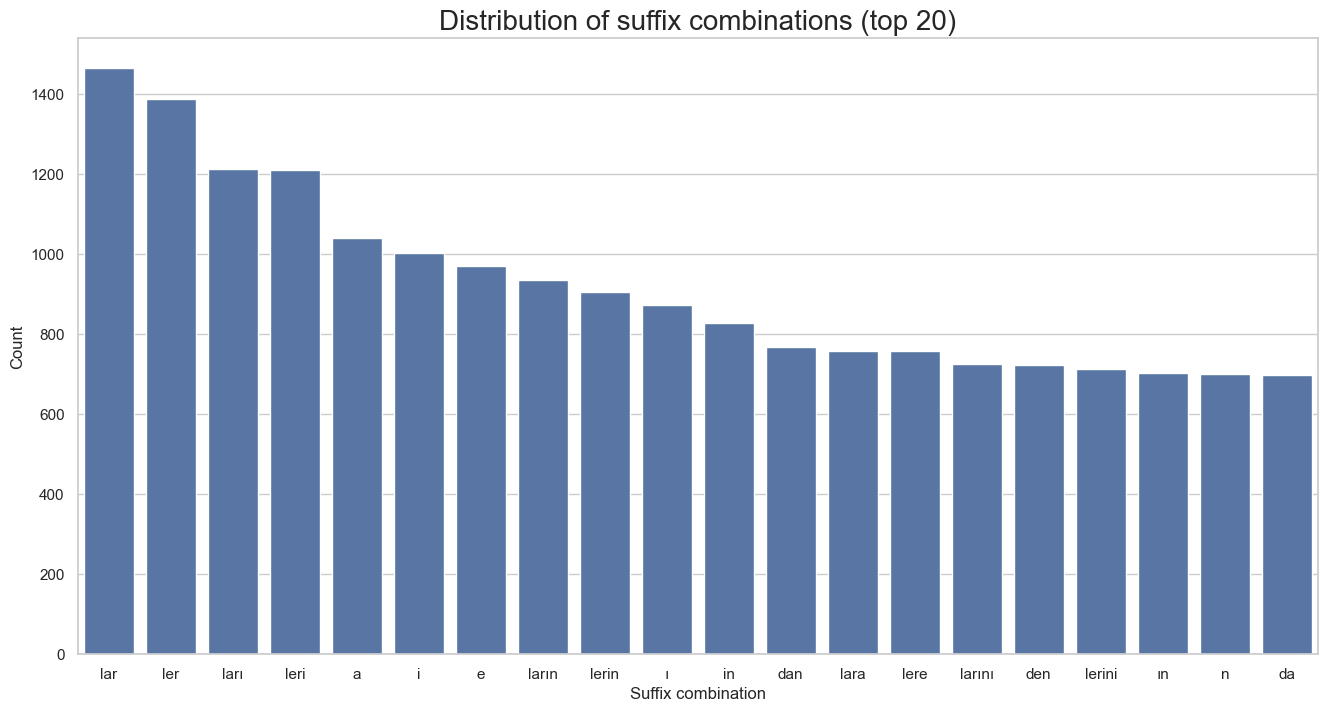

In [34]:
morpheme_combs = []

for sample in btwd_data["data"]:
    morpheme_combs.append("".join(sample["morphemes"]))

morpheme_combs_counter = Counter(morpheme_combs)
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Distribution of suffix combinations (top 20)")
ax.set_xlabel("Suffix combination")
ax.set_ylabel("Count")
# set the title font size
ax.title.set_size(20)
sns.barplot(dict(morpheme_combs_counter.most_common(20)), ax=ax)

<Axes: title={'center': 'Distribution of number of suffixes'}, xlabel='Number of suffixes', ylabel='Count'>

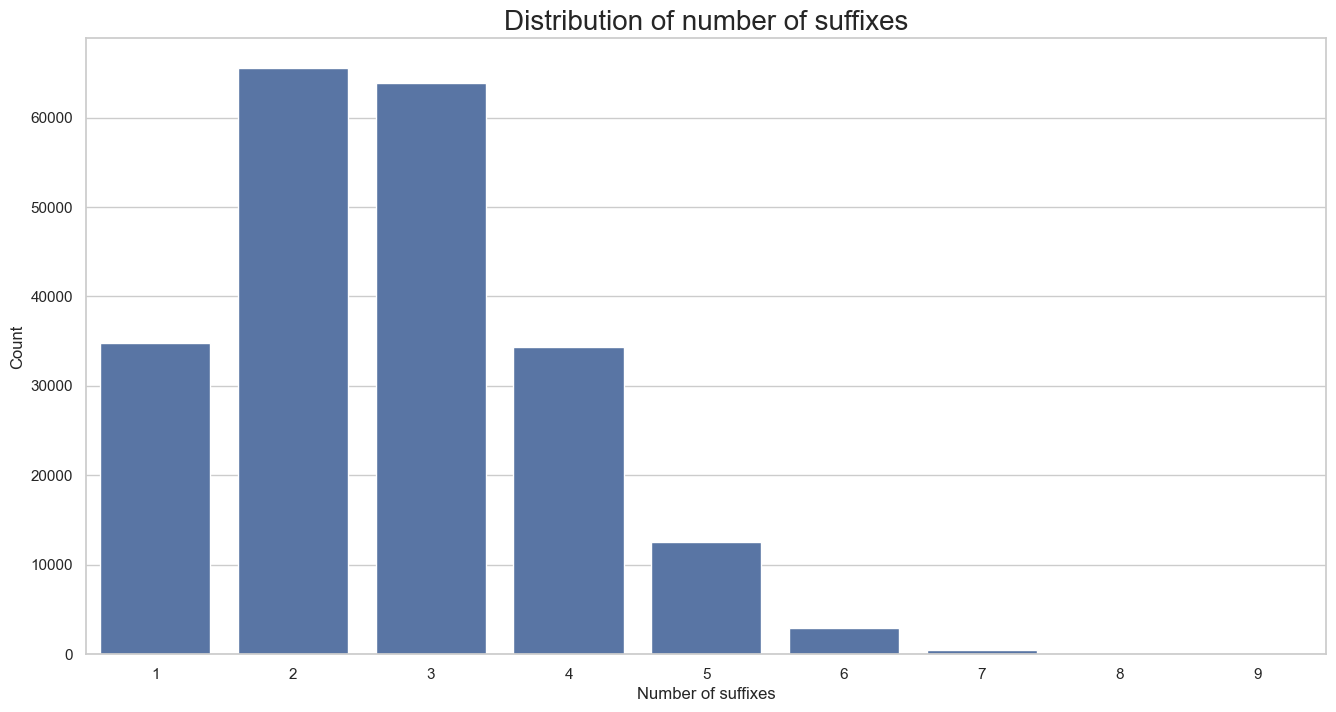

In [35]:
number_of_suffixes = []

for sample in btwd_data["data"]:
    number_of_suffixes.append(len(sample["morphemes"]))

number_of_suffixes_counter = Counter(number_of_suffixes)
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Distribution of number of suffixes")
ax.set_xlabel("Number of suffixes")
ax.set_ylabel("Count")
# set the title font size
ax.title.set_size(20)
sns.barplot(dict(number_of_suffixes_counter), ax=ax)

In [36]:
number_of_suffixes_counter

Counter({2: 65580,
         3: 63813,
         1: 34819,
         4: 34309,
         5: 12533,
         6: 2980,
         7: 433,
         8: 50,
         9: 7})

In [39]:
balanced_data = read_json("../../data/tr/bilkent-turkish-writings/btwd_prep_post_balanced.json")

Counter({1: 50, 2: 50, 3: 50, 4: 50, 5: 50, 6: 50, 7: 50, 8: 37, 9: 5})


<Axes: title={'center': 'Distribution of number of suffixes'}, xlabel='Number of suffixes', ylabel='Count'>

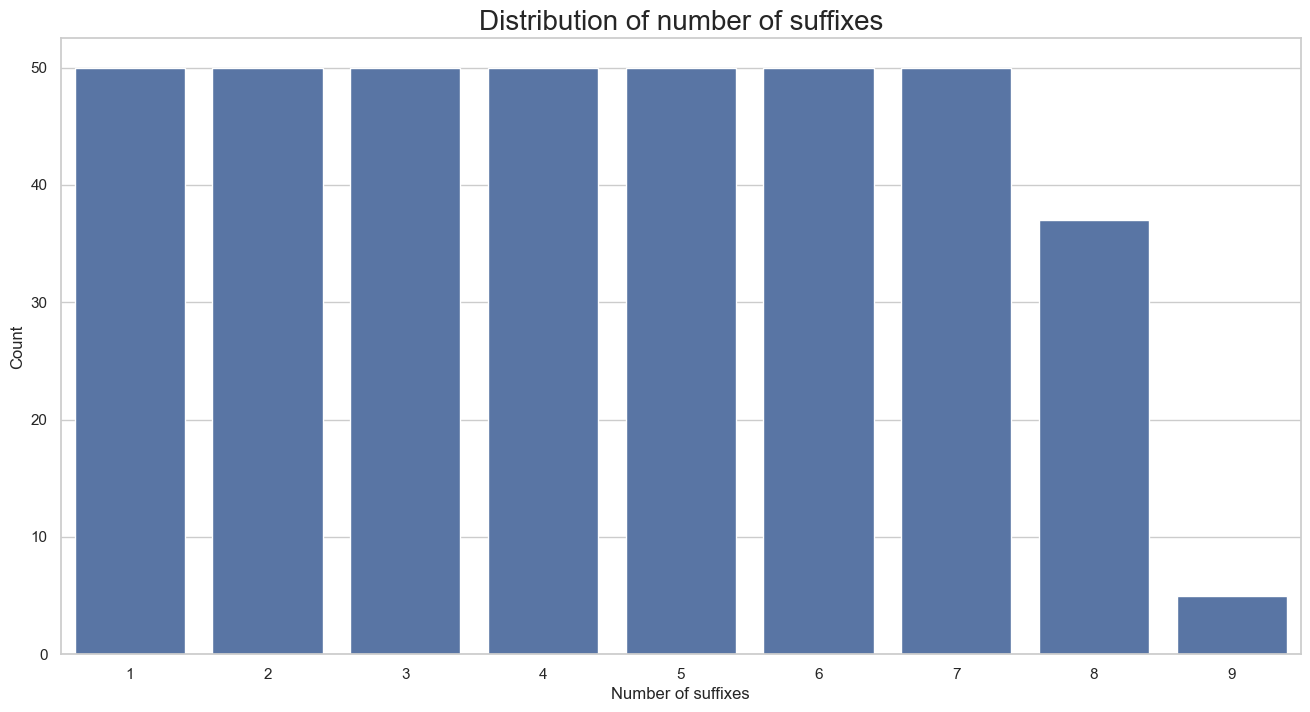

In [40]:
number_of_suffixes = []

for sample in balanced_data["data"]:
    number_of_suffixes.append(len(sample["morphemes"]))

number_of_suffixes_counter = Counter(number_of_suffixes)
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Distribution of number of suffixes")
ax.set_xlabel("Number of suffixes")
ax.set_ylabel("Count")
# set the title font size
ax.title.set_size(20)
print(number_of_suffixes_counter)
sns.barplot(dict(number_of_suffixes_counter), ax=ax)

In [19]:
import pandas as pd

tab_results = pd.read_csv("../experiments/outputs/gpt-3.5-turbo/tr/btwd/temp_en/v_balanced/tab_results.csv")

<Axes: title={'center': 'Faithfulness \n [lang=tr, temp=en, model=gpt-3.5-turbo, dist=ID, task=morph-disc]'}, xlabel='Number of suffixes', ylabel='Faithfulness'>

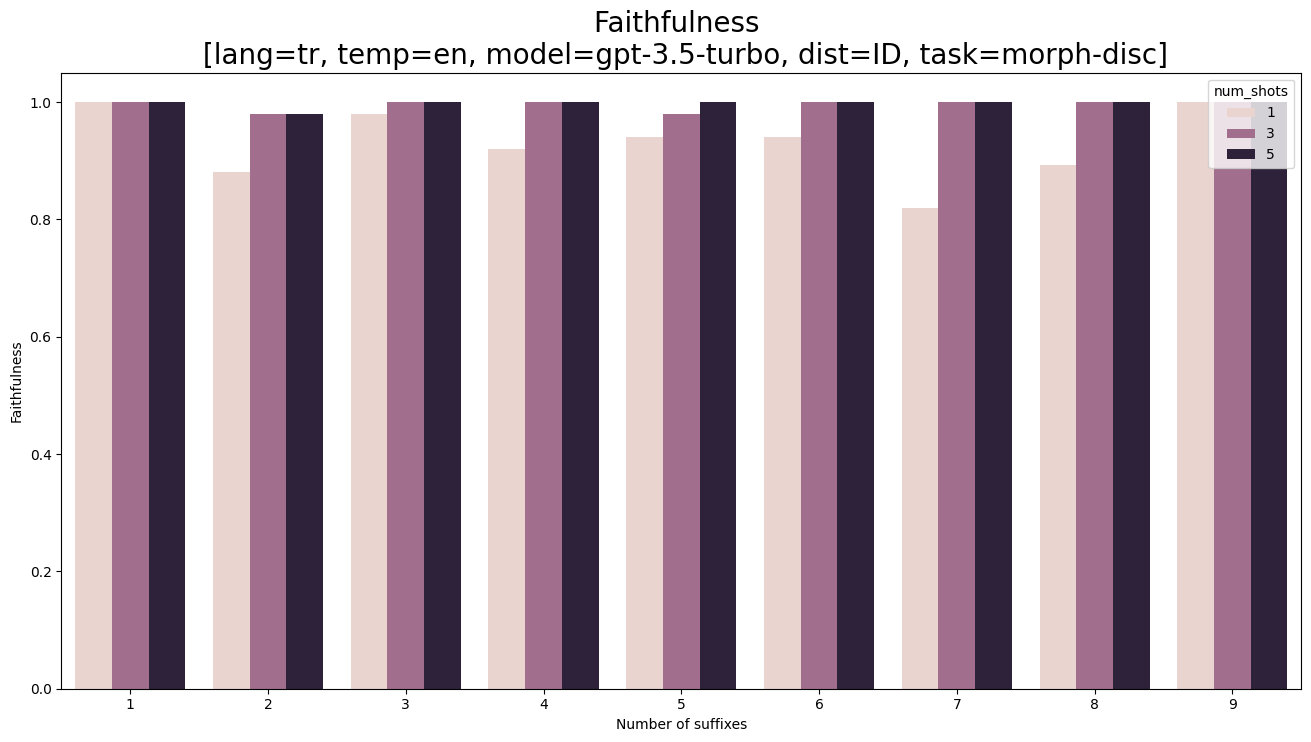

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Faithfulness \n [lang=tr, temp=en, model=gpt-3.5-turbo, dist=ID, task=morph-disc]")
ax.set_xlabel("Number of suffixes")
ax.set_ylabel("Faithfulness")
ax.title.set_size(20)
sns.barplot(data=tab_results.query("is_ood == False & task == 'morph-disc'"), x="num_suffixes", y="faithfulness", hue="num_shots", ax=ax, errorbar=None)

<Axes: title={'center': 'Faithfulness \n [lang=tr, temp=en, model=gpt-3.5-turbo, dist=OOD, task=morph-disc]'}, xlabel='Number of suffixes', ylabel='Faithfulness'>

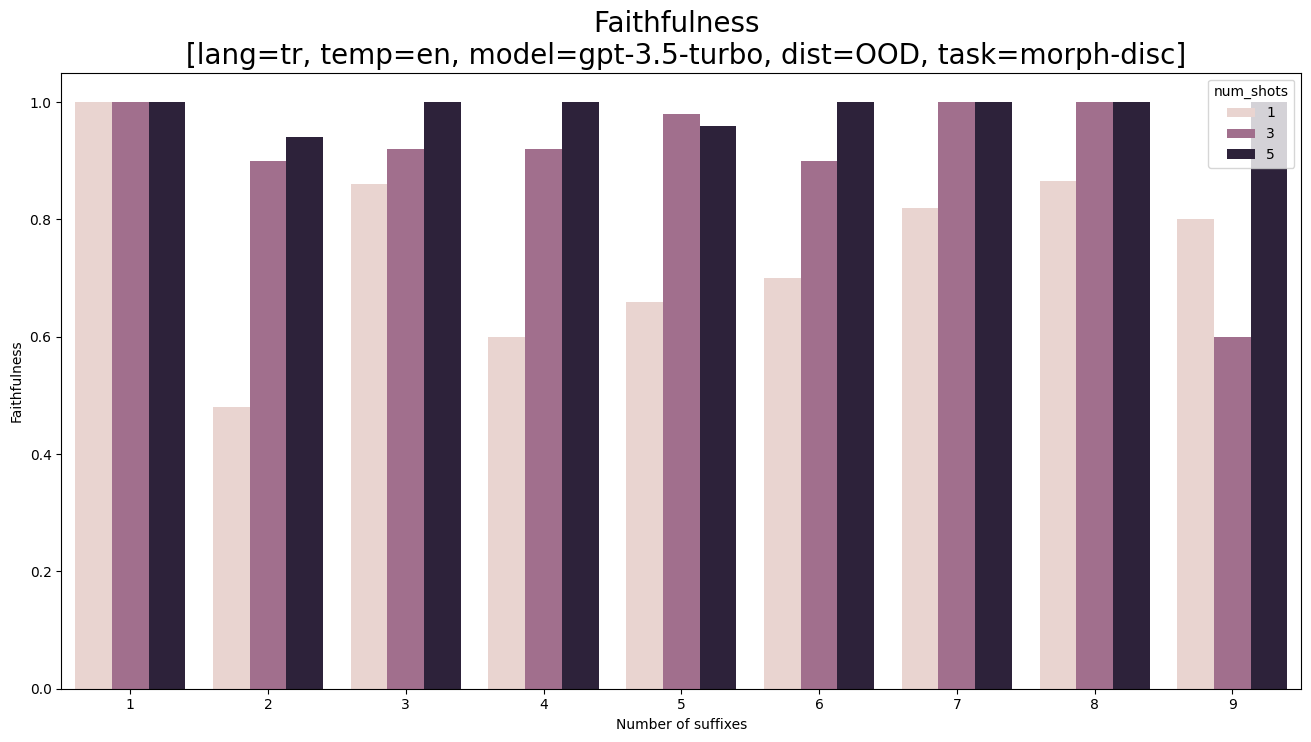

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Faithfulness \n [lang=tr, temp=en, model=gpt-3.5-turbo, dist=OOD, task=morph-disc]")
ax.set_xlabel("Number of suffixes")
ax.set_ylabel("Faithfulness")
ax.title.set_size(20)
sns.barplot(data=tab_results.query("is_ood == True & task == 'morph-disc'"), x="num_suffixes", y="faithfulness", hue="num_shots", ax=ax, errorbar=None)

<Axes: title={'center': 'Faithfulness \n [lang=tr, temp=en, model=gpt-3.5-turbo, dist=ID, task=morph-gen]'}, xlabel='Number of suffixes', ylabel='Faithfulness'>

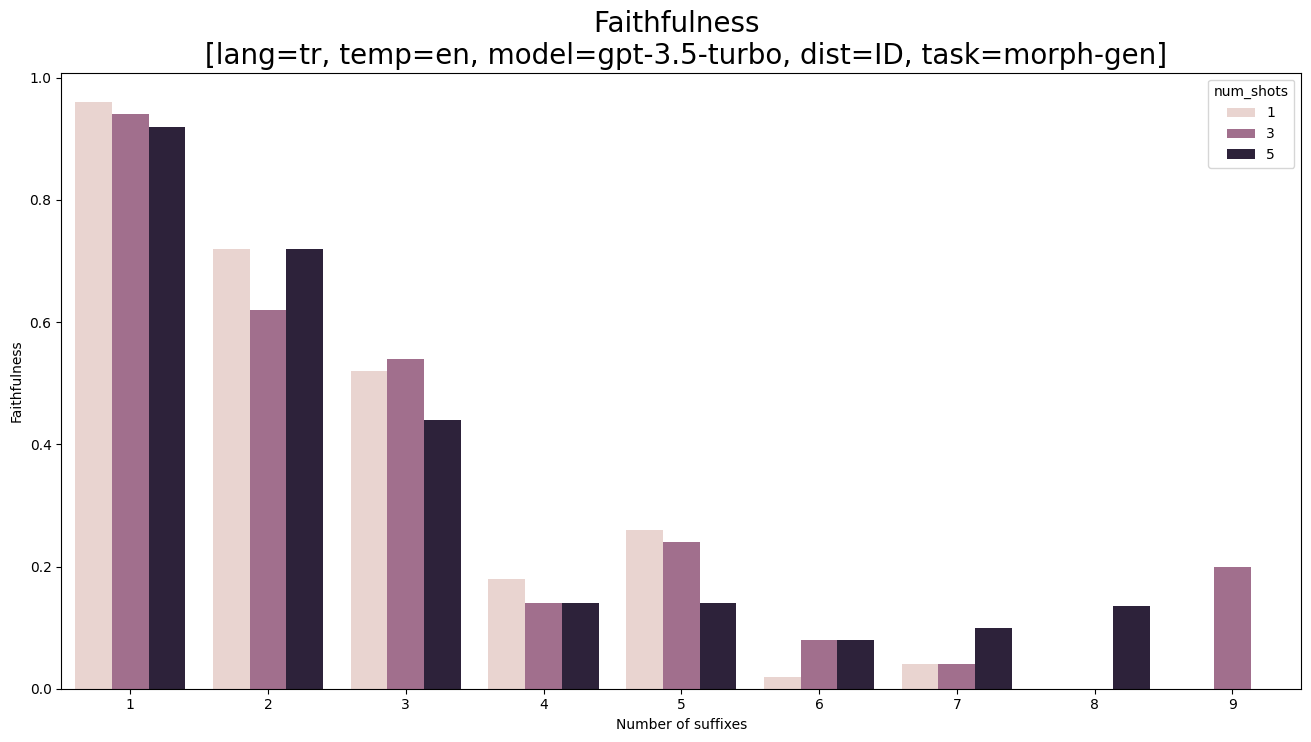

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Faithfulness \n [lang=tr, temp=en, model=gpt-3.5-turbo, dist=ID, task=morph-gen]")
ax.set_xlabel("Number of suffixes")
ax.set_ylabel("Faithfulness")
ax.title.set_size(20)
sns.barplot(data=tab_results.query("is_ood == False & task == 'morph-gen'"), x="num_suffixes", y="faithfulness", hue="num_shots", ax=ax, errorbar=None)

<Axes: title={'center': 'Faithfulness \n [lang=tr, temp=en, model=gpt-3.5-turbo, dist=OOD, task=morph-gen]'}, xlabel='Number of suffixes', ylabel='Faithfulness'>

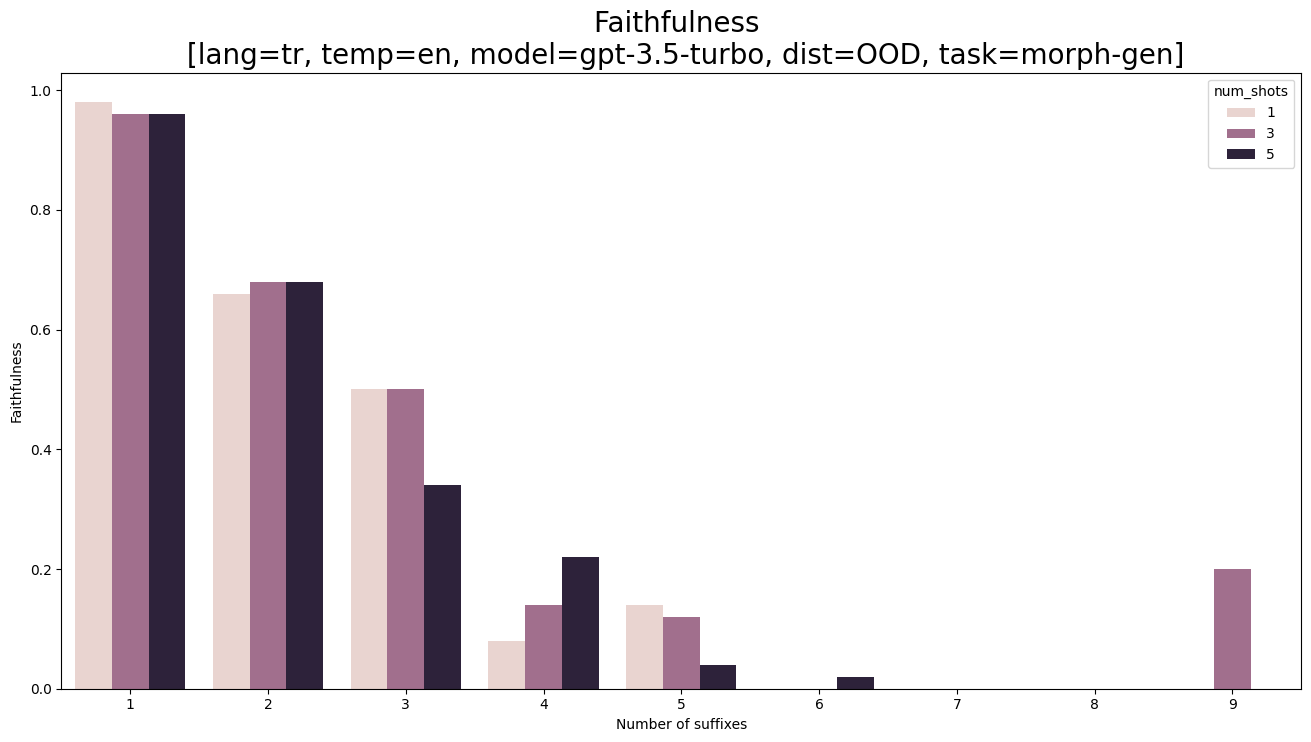

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Faithfulness \n [lang=tr, temp=en, model=gpt-3.5-turbo, dist=OOD, task=morph-gen]")
ax.set_xlabel("Number of suffixes")
ax.set_ylabel("Faithfulness")
ax.title.set_size(20)
sns.barplot(data=tab_results.query("is_ood == True & task == 'morph-gen'"), x="num_suffixes", y="faithfulness", hue="num_shots", ax=ax, errorbar=None)

In [14]:
import pandas as pd

tab_results = pd.read_csv("../experiments/outputs/gpt-3.5-turbo/tr/btwd/temp_tr/v_balanced/tab_results.csv")

<Axes: title={'center': 'Accuracy \n [lang=tr, temp=tr, model=gpt-3.5-turbo, dist=ID, task=morph-disc]'}, xlabel='Number of suffixes', ylabel='Accuracy'>

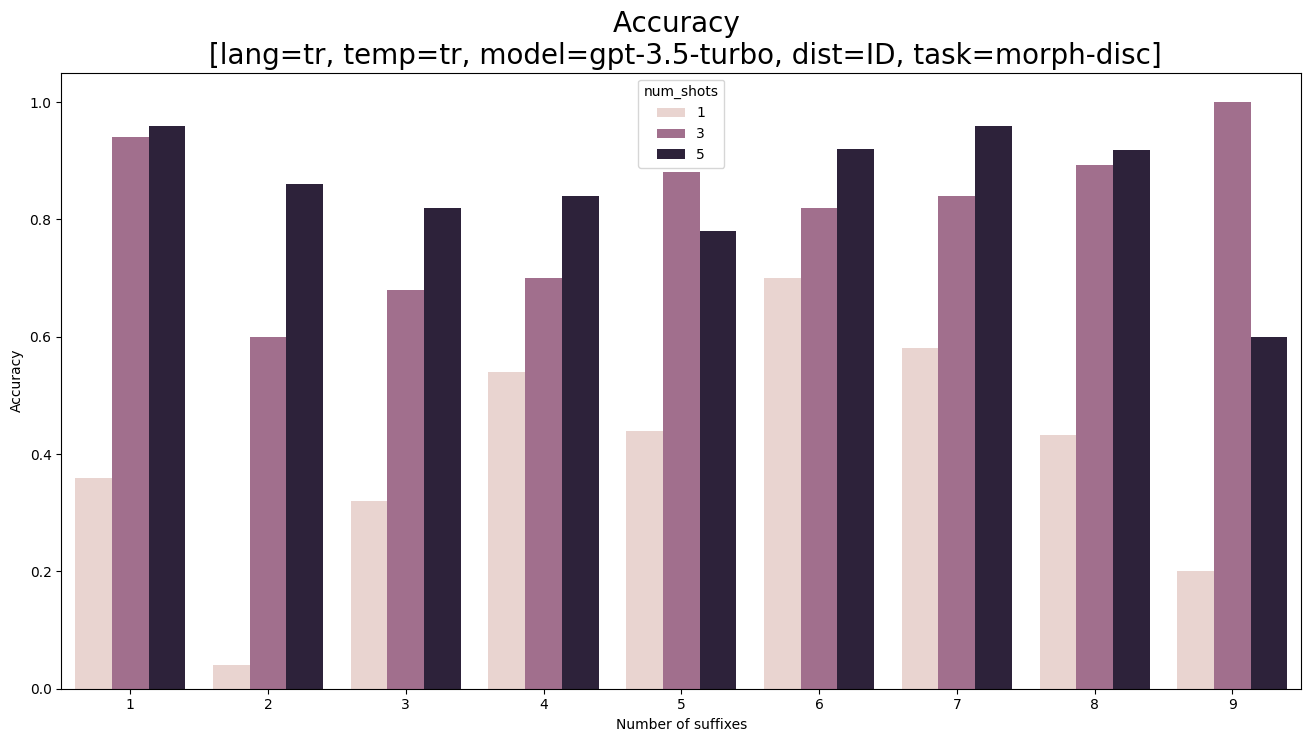

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Accuracy \n [lang=tr, temp=tr, model=gpt-3.5-turbo, dist=ID, task=morph-disc]")
ax.set_xlabel("Number of suffixes")
ax.set_ylabel("Accuracy")
ax.title.set_size(20)
sns.barplot(data=tab_results.query("is_ood == False & task == 'morph-disc'"), x="num_suffixes", y="accuracy", hue="num_shots", ax=ax, errorbar=None)

<Axes: title={'center': 'Accuracy \n [lang=tr, temp=tr, model=gpt-3.5-turbo, dist=OOD, task=morph-disc]'}, xlabel='Number of suffixes', ylabel='Accuracy'>

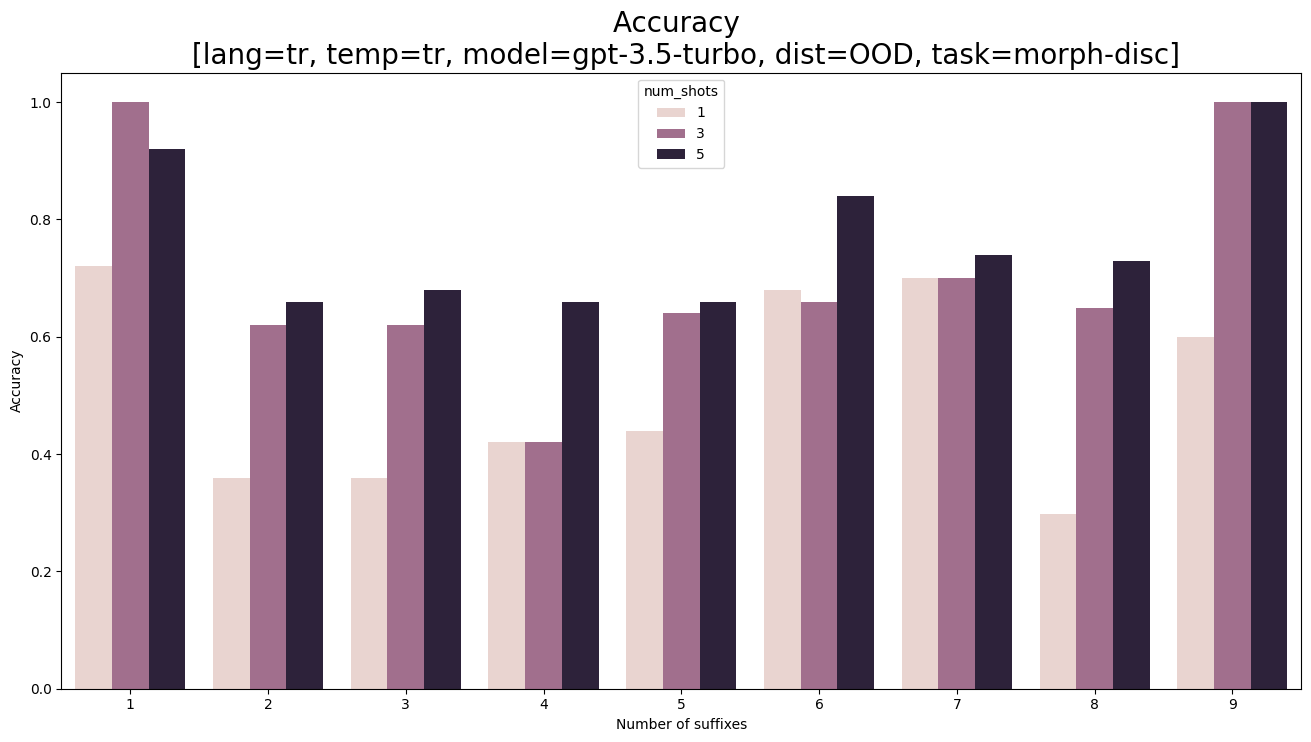

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Accuracy \n [lang=tr, temp=tr, model=gpt-3.5-turbo, dist=OOD, task=morph-disc]")
ax.set_xlabel("Number of suffixes")
ax.set_ylabel("Accuracy")
ax.title.set_size(20)
sns.barplot(data=tab_results.query("is_ood == True & task == 'morph-disc'"), x="num_suffixes", y="accuracy", hue="num_shots", ax=ax, errorbar=None)

<Axes: title={'center': 'Accuracy \n [lang=tr, temp=tr, model=gpt-3.5-turbo, dist=ID, task=morph-gen]'}, xlabel='Number of suffixes', ylabel='Accuracy'>

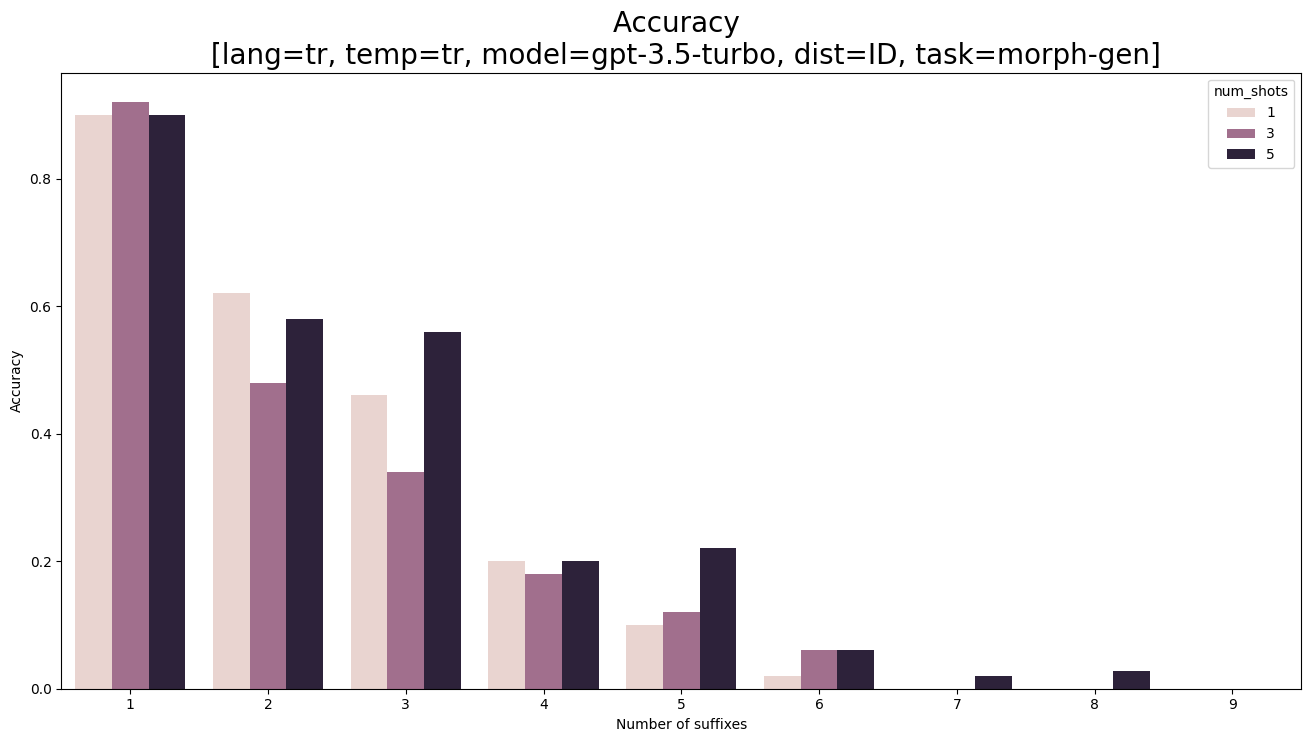

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Accuracy \n [lang=tr, temp=tr, model=gpt-3.5-turbo, dist=ID, task=morph-gen]")
ax.set_xlabel("Number of suffixes")
ax.set_ylabel("Accuracy")
ax.title.set_size(20)
sns.barplot(data=tab_results.query("is_ood == False & task == 'morph-gen'"), x="num_suffixes", y="accuracy", hue="num_shots", ax=ax, errorbar=None)

<Axes: title={'center': 'Accuracy \n [lang=tr, temp=tr, model=gpt-3.5-turbo, dist=OOD, task=morph-gen]'}, xlabel='Number of suffixes', ylabel='Accuracy'>

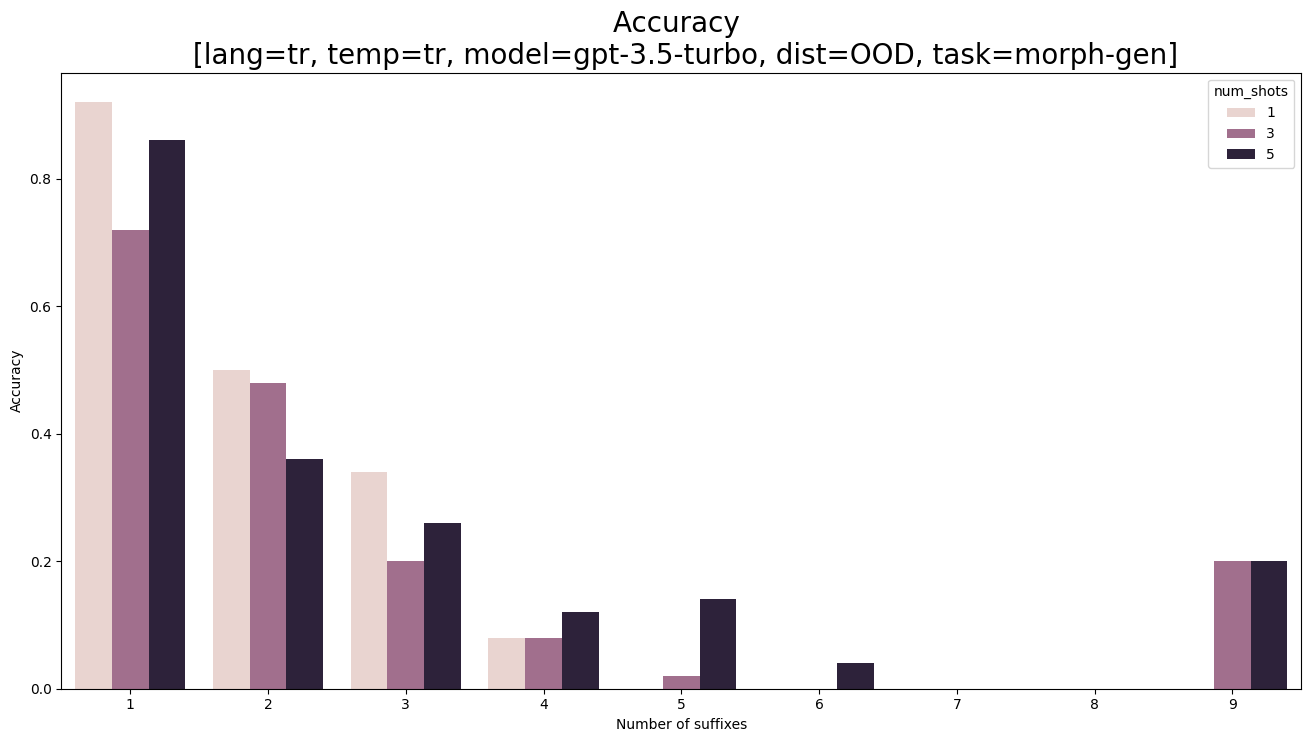

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Accuracy \n [lang=tr, temp=tr, model=gpt-3.5-turbo, dist=OOD, task=morph-gen]")
ax.set_xlabel("Number of suffixes")
ax.set_ylabel("Accuracy")
ax.title.set_size(20)
sns.barplot(data=tab_results.query("is_ood == True & task == 'morph-gen'"), x="num_suffixes", y="accuracy", hue="num_shots", ax=ax, errorbar=None)

In [30]:
from utils import read_json

en_data = read_json("../data/en/MorphoLEX_en_prep.json")

In [31]:
len(en_data["data"])

6319

In [32]:
unique_roots = set()

for sample in en_data["data"]:
    unique_roots.add(sample["root"])

len(unique_roots)

3028

In [33]:
unique_morphemes = set()

for sample in en_data["data"]:
    unique_morphemes.update(set(sample["morphemes"]))

len(unique_morphemes)

395

In [34]:
unique_morphemes_combs = set()

for sample in en_data["data"]:
    unique_morphemes_combs.add(tuple(sample["morphemes"]))

len(unique_morphemes_combs)

604

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

sns.set_theme(style="whitegrid")

<Axes: title={'center': 'Distribution of suffixes (top 20)'}, xlabel='Suffix', ylabel='Count'>

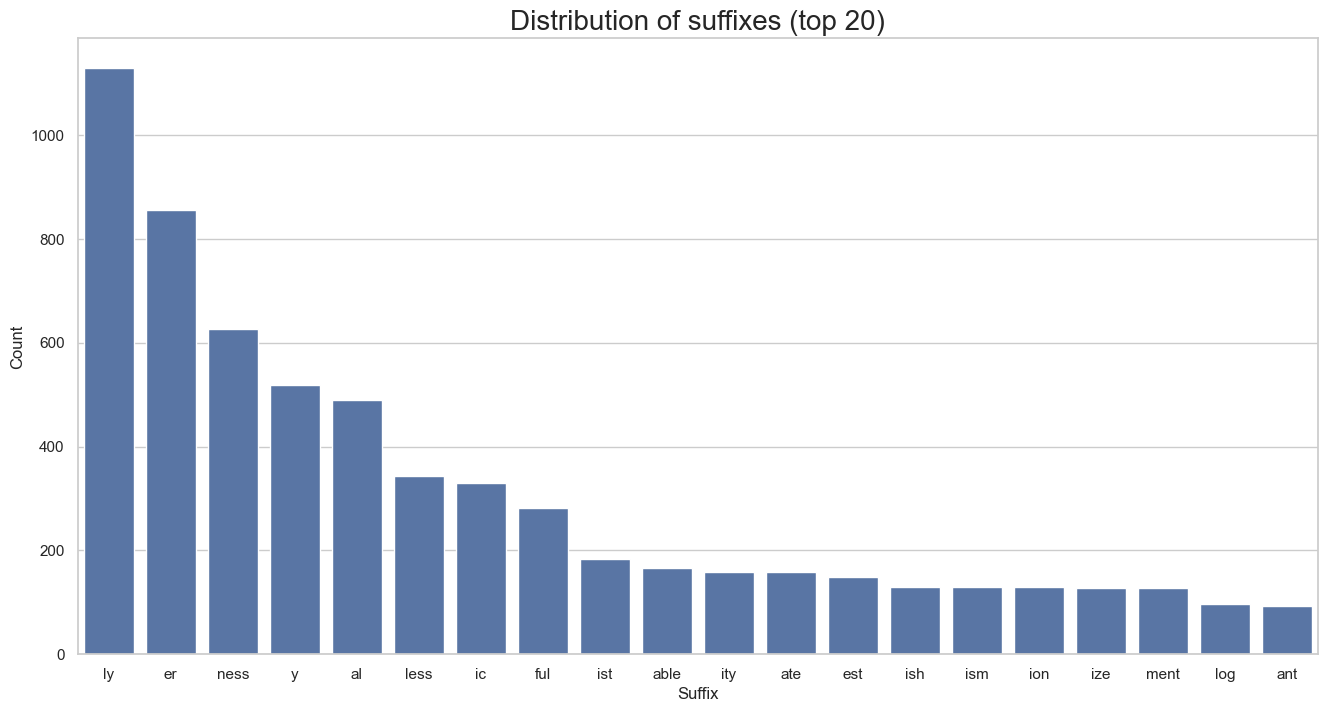

In [36]:
morphemes = []

for sample in en_data["data"]:
    morphemes.extend(sample["morphemes"])

morpheme_counter = Counter(morphemes)
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Distribution of suffixes (top 20)")
ax.set_xlabel("Suffix")
ax.set_ylabel("Count")
ax.title.set_size(20)
sns.barplot(dict(morpheme_counter.most_common(20)), ax=ax)

<Axes: title={'center': 'Distribution of suffix combinations (top 20)'}, xlabel='Suffix combination', ylabel='Count'>

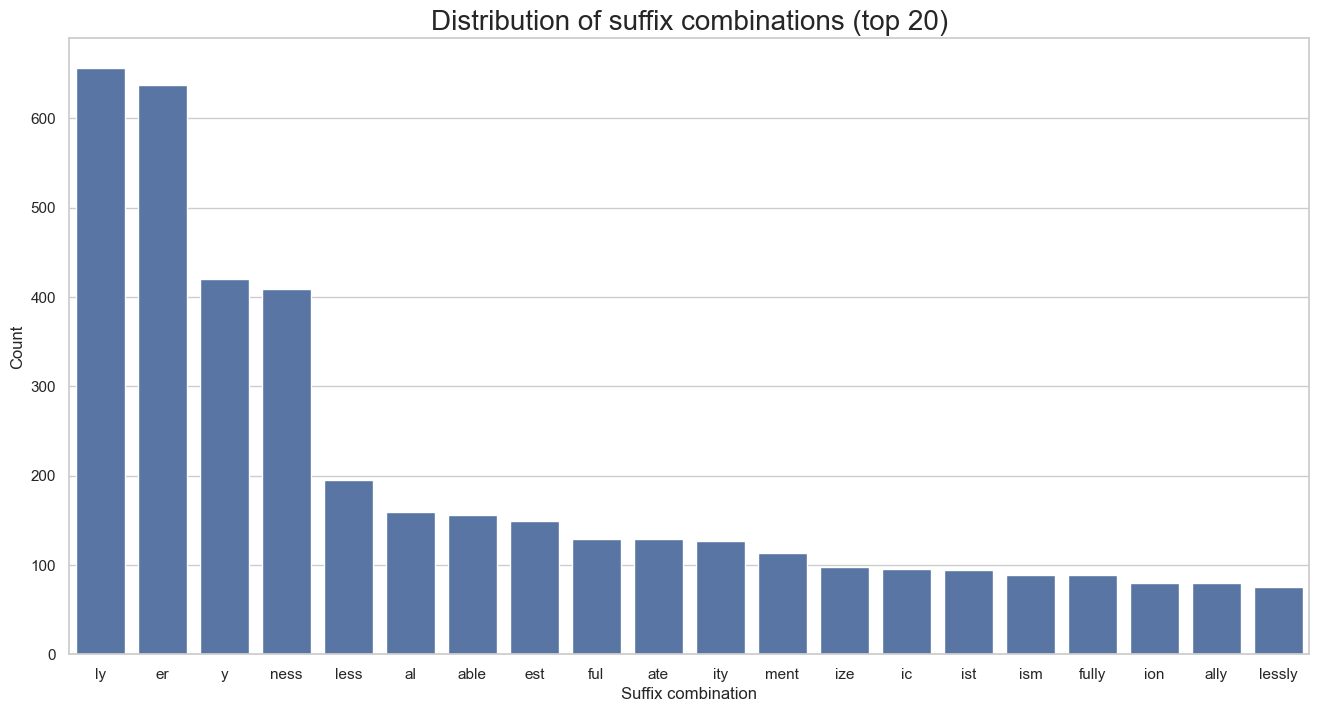

In [37]:
morpheme_combs = []

for sample in en_data["data"]:
    morpheme_combs.append("".join(sample["morphemes"]))

morpheme_combs_counter = Counter(morpheme_combs)
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Distribution of suffix combinations (top 20)")
ax.set_xlabel("Suffix combination")
ax.set_ylabel("Count")
# set the title font size
ax.title.set_size(20)
sns.barplot(dict(morpheme_combs_counter.most_common(20)), ax=ax)

<Axes: title={'center': 'Distribution of number of suffixes'}, xlabel='Number of suffixes', ylabel='Count'>

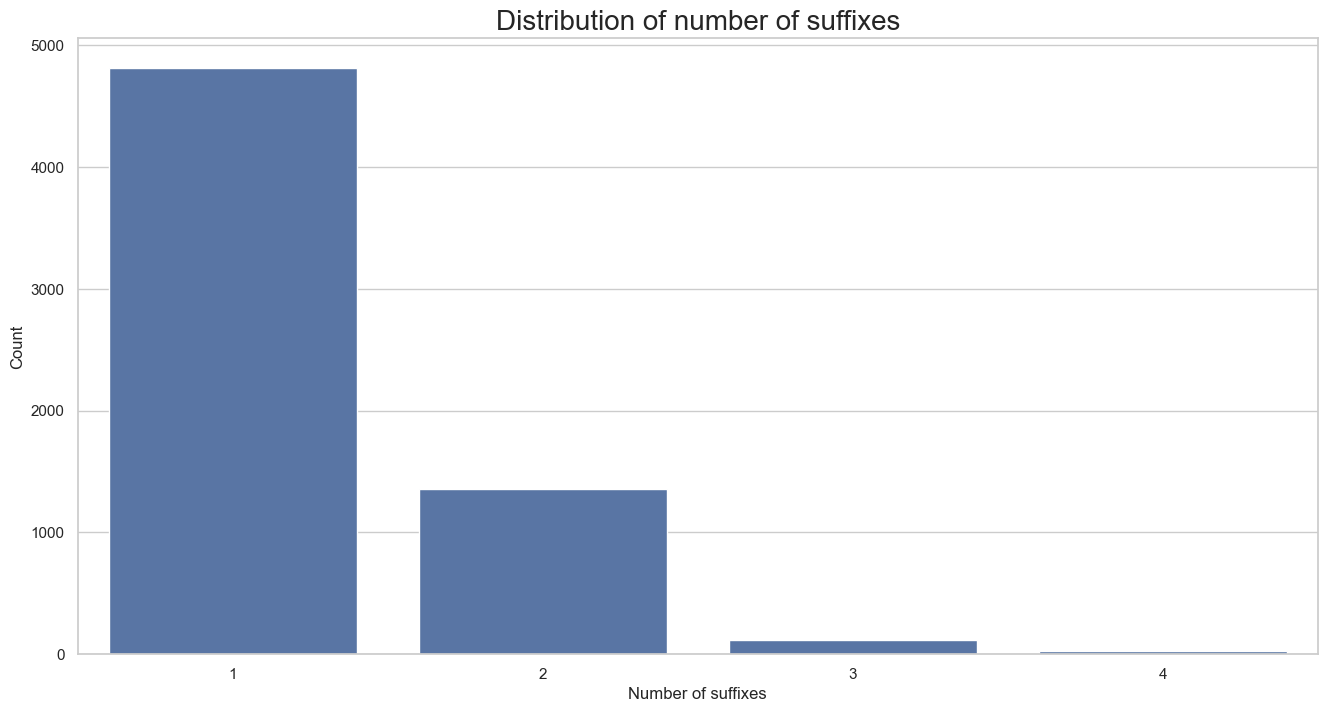

In [38]:
number_of_suffixes = []

for sample in en_data["data"]:
    number_of_suffixes.append(len(sample["morphemes"]))

number_of_suffixes_counter = Counter(number_of_suffixes)
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Distribution of number of suffixes")
ax.set_xlabel("Number of suffixes")
ax.set_ylabel("Count")
# set the title font size
ax.title.set_size(20)
sns.barplot(dict(number_of_suffixes_counter), ax=ax)

In [39]:
number_of_suffixes_counter

Counter({1: 4818, 2: 1358, 3: 117, 4: 26})

In [40]:
balanced_data = read_json("../data/en/MorphoLEX_en_prep_balanced.json")

Counter({1: 25, 2: 25, 3: 25, 4: 24})


<Axes: title={'center': 'Distribution of number of suffixes'}, xlabel='Number of suffixes', ylabel='Count'>

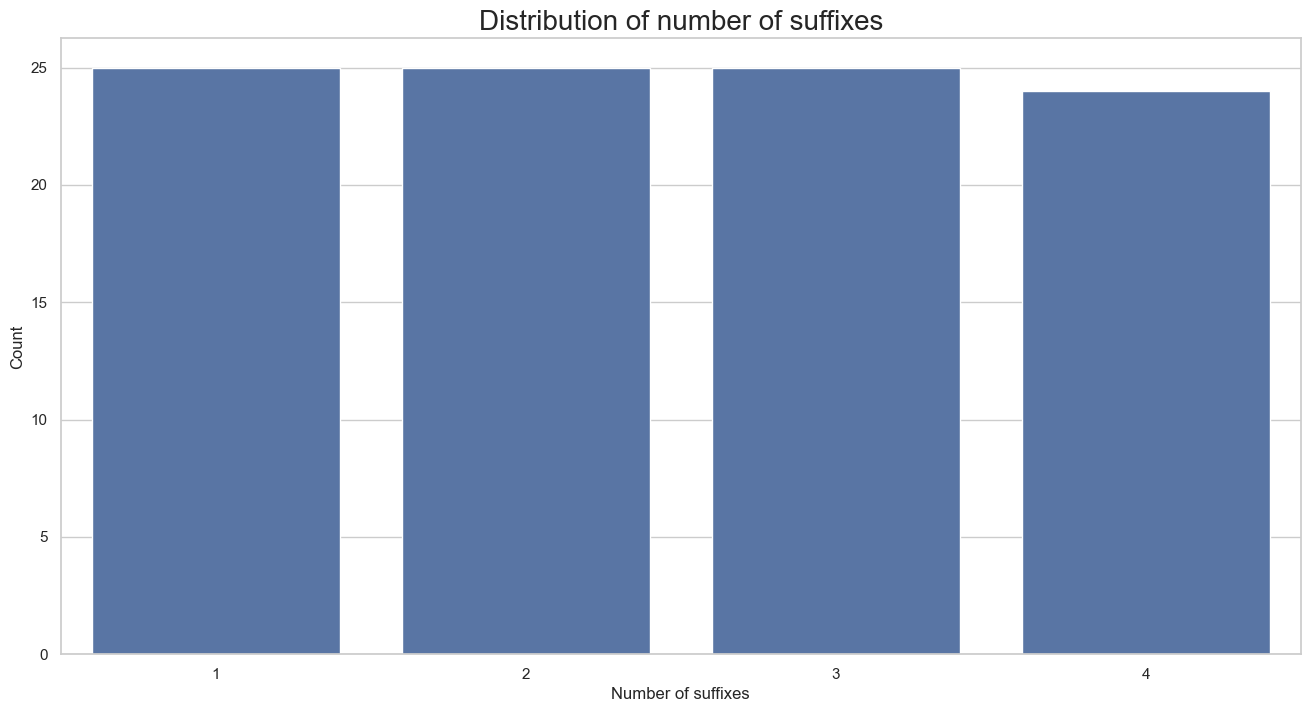

In [41]:
number_of_suffixes = []

for sample in balanced_data["data"]:
    number_of_suffixes.append(len(sample["morphemes"]))

number_of_suffixes_counter = Counter(number_of_suffixes)
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Distribution of number of suffixes")
ax.set_xlabel("Number of suffixes")
ax.set_ylabel("Count")
# set the title font size
ax.title.set_size(20)
print(number_of_suffixes_counter)
sns.barplot(dict(number_of_suffixes_counter), ax=ax)